# Final project

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://p0.pikrepo.com/preview/226/186/artificial-intelligence-concept.jpg" width="350px" height="180px" />

In the final proyect you will tackle some problem using a probabilistic graphical model that you will propose. You are allowed to use all the tools we saw throughout the course to this end, and then you will evaluate the performance of your model in terms of the problem.

The project will be done by pairs.
___

## 1. Problem description

First of all, you should clearly describe the problem you are trying to solve, and how the data is generated.

Not only text should be included. A diagram of the situation, pictures or some visual material is of great help.

**Coronary heart disease** continues to be a leading cause of morbidity and mortality among adults in Europe and North America.

1 Risk factors have included blood pressure, cigarette smoking, cholesterol (TC), LDL-C, HDL-C, and diabetes.234 Factors such as obesity, left ventricular hypertrophy, family history of premature CHD, and ERT have also been considered in defining CHD risk.567 Data from population studies enabled prediction of CHD during a follow-up interval of several years, based on blood pressure, smoking history, TC and HDL-C levels, diabetes, and left ventricular hypertrophy on the ECG. These prediction algorithms have been adapted to simplified score sheets that allow physicians to estimate multivariable CHD risk in middle-aged patients.8

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation


The dietary factors believed to be linked with the incidence of coronary heart disease are reviewed in the light of evidence with regard to their functional role, either in protection or in promotion. Detailed analysis of the evidence shows that the relations are more complex than the current lipid hypothesis suggests. It is proposed that, in particular, the polyunsaturated/saturated ratio as a measure of the propensity of the diet to influence the incidence of coronary heart disease should be replaced by indices of atherogenicity and thrombogenicity.


We have four diferent types of input variables, Demographic, Behavioral, Medical - Historical and Medical - Actual. All the variables were discreticized before including them in the model. Each of them was analyzed to detail before the discretization process with the intention of having a detailed representation of the data. In the following list we present the variables includede in the models, a little description of each of them and if there was any special consideration while discreticizing it.

**Demographic:**\
• *Sex*: male or female("M" or "F")\
• *Education*: Level of education achieved (elementary - college)\
• *Age*: Age of the patient;( The recorded ages have been truncated to whole numbers, the concept of age is continuous) -> Since we have data of patients between 30 and 70 years old, we decided to clasify them in 3 different groups, (Age<45 : Young Adults, Age<60 : Adults, Age>60 : Elders)

**Behavioral**:\
• *is_smoking*: whether or not the patient is a current smoker ("YES" or "NO")\
• *Cigs Per Day*: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) -> We wanted to be really carefull with this variable because it goes from 1 cigarrete per day to 70 cigarrets per day. So what we decided it to have small batches so that we have a more precise probability in each. Our batches considered 5 cigarrettes each.

**Medical (history)**\
• *BP Meds*: whether or not the patient was on blood pressure medication (Nominal)\
• *Prevalent Stroke*: whether or not the patient had previously had a stroke (Nominal)\
• *Prevalent Hyp*: whether or not the patient was hypertensive (Nominal)\
• *Diabetes*: whether or not the patient had diabetes (Nominal)

**Medical(current)** -> for all the variables belowm we decided to do a research about the stablished levels of each one and create one batch for each described level. With the help of an expert who helped us in the classification and handing us a few useful links to review before the discretization.\
• *Tot Chol*: total cholesterol level -> [1 optimum, 2 close to optimum, 3 limit high, 4 high, 5 very high]\
• *Sys BP*: systolic blood pressure -> [1 normal, 2 high, 3 hipertention, 4 hipertention-2, 5 crisis]\
• *Dia BP*: diastolic blood pressure -> [1 normal, 2 high, 3 hipertention, 4 crisis]\
• *BMI*: Body Mass Index -> [1 underweight, 2 normal, 3 overweight, 4 obesity, 5 obesity-1, 5 obesity-2, 5 obesity-3]\
• *Heart Rate*: heart rate (In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) -> [1 low, 2 normal, 3 high]\
• *Glucose*: glucose level -> [1 normal, 2 prediabetes, 3 diabetes]

**Predict variable (desired target)**\
• 10 year risk of Coronary Heart Disease CHD(binary: “1”, means “Yes”, “0” means “No”)

*Source:*

https://www.kaggle.com/christofel04/cardiovascular-study-dataset-predict-heart-disea

In [535]:
import pandas as pd
import pgmpy 
import seaborn as sns
import numpy as np

In [536]:
# Define database
df = pd.read_excel(io='./cardiovascular/traindata.xlsx',sheet_name='train',header=0)
df_org = df.copy()
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,3,2.0,1,1,1.0,0.0,0,0,0,5.0,5,2,NaN,3.0,1.0,1
1,1,1,4.0,0,0,1.0,0.0,0,1,0,5.0,5,4,4.0,2.0,1.0,0
2,2,2,1.0,1,1,3.0,0.0,0,0,0,5.0,1,1,2.0,3.0,1.0,0
3,3,2,1.0,0,1,5.0,0.0,0,1,0,5.0,5,2,4.0,2.0,1.0,1
4,4,3,1.0,1,1,7.0,0.0,0,0,0,5.0,3,2,4.0,2.0,1.0,0


In [537]:
df_org = df.copy()
df.astype(pd.Int64Dtype())
df.loc[df['is_smoking']==0,'cigsPerDay']=0
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,3,2.0,1,1,1.0,0.0,0,0,0,5.0,5,2,NaN,3.0,1.0,1
1,1,1,4.0,0,0,0.0,0.0,0,1,0,5.0,5,4,4.0,2.0,1.0,0
2,2,2,1.0,1,1,3.0,0.0,0,0,0,5.0,1,1,2.0,3.0,1.0,0
3,3,2,1.0,0,1,5.0,0.0,0,1,0,5.0,5,2,4.0,2.0,1.0,1
4,4,3,1.0,1,1,7.0,0.0,0,0,0,5.0,3,2,4.0,2.0,1.0,0


In [538]:

#%% REPORTE DE CALIDAD DE LOS DATOS
def dqr(data):
    # Lista de variables de la base de datos
    cols = pd.DataFrame(list(data.columns.values),
                           columns=['Nombres'],
                           index=list(data.columns.values))
    #lista de tipos de datos
    dtyp = pd.DataFrame(data.dtypes,columns=['Tipo'])
    # lista de datos perdidos
    misval = pd.DataFrame(data.isnull().sum(),
                                  columns=['Valores_Perdidos'])
    # Lista de los datos presentes
    presval = pd.DataFrame(data.count(),
                                  columns=['Valores_Presentes'])
    # Lista de valores unicos
    unival = pd.DataFrame(columns=['Valores_Unicos'])
    # Lista de valores minimos
    minval = pd.DataFrame(columns=['Min'])
    # Lista de valores maximos
    maxval = pd.DataFrame(columns=['Max'])
    for col in list(data.columns.values):
        unival.loc[col] = [data[col].nunique()]
        try:
            minval.loc[col] = [data[col].min()]
            maxval.loc[col] = [data[col].max()]
        except:
            pass
    
    # Juntar todas las tablas
    return cols.join(dtyp).join(misval).join(presval).join(unival).join(minval).join(maxval)

reporte = dqr(df)

In [539]:
reporte

,Nombres,Tipo,Valores_Perdidos,Valores_Presentes,Valores_Unicos,Min,Max
id,id,int64,0,3390,3390,0,3389
age,age,int64,0,3390,3,1,3
education,education,float64,87,3303,4,1,4
sex,sex,int64,0,3390,2,0,1
is_smoking,is_smoking,int64,0,3390,2,0,1
cigsPerDay,cigsPerDay,float64,22,3368,14,0,14
BPMeds,BPMeds,float64,44,3346,2,0,1
prevalentStroke,prevalentStroke,int64,0,3390,2,0,1
prevalentHyp,prevalentHyp,int64,0,3390,2,0,1
diabetes,diabetes,int64,0,3390,2,0,1


In [540]:
"""
The suggest from Medical is to remove missing values, specially those that are biological, 
and do not fill them with mean or other techniques.
"""
df_org = df.copy()
df = df.dropna()
print('Remove Nan')
print('{} from {}'.format(df_org.shape[0]-df.shape[0],df_org.shape[0]))

Remove Nan
463 from 3390


In [349]:
X_cols = list(df.columns.values[:])
df[X_cols].shape

(2927, 17)

<Figure size 432x288 with 0 Axes>

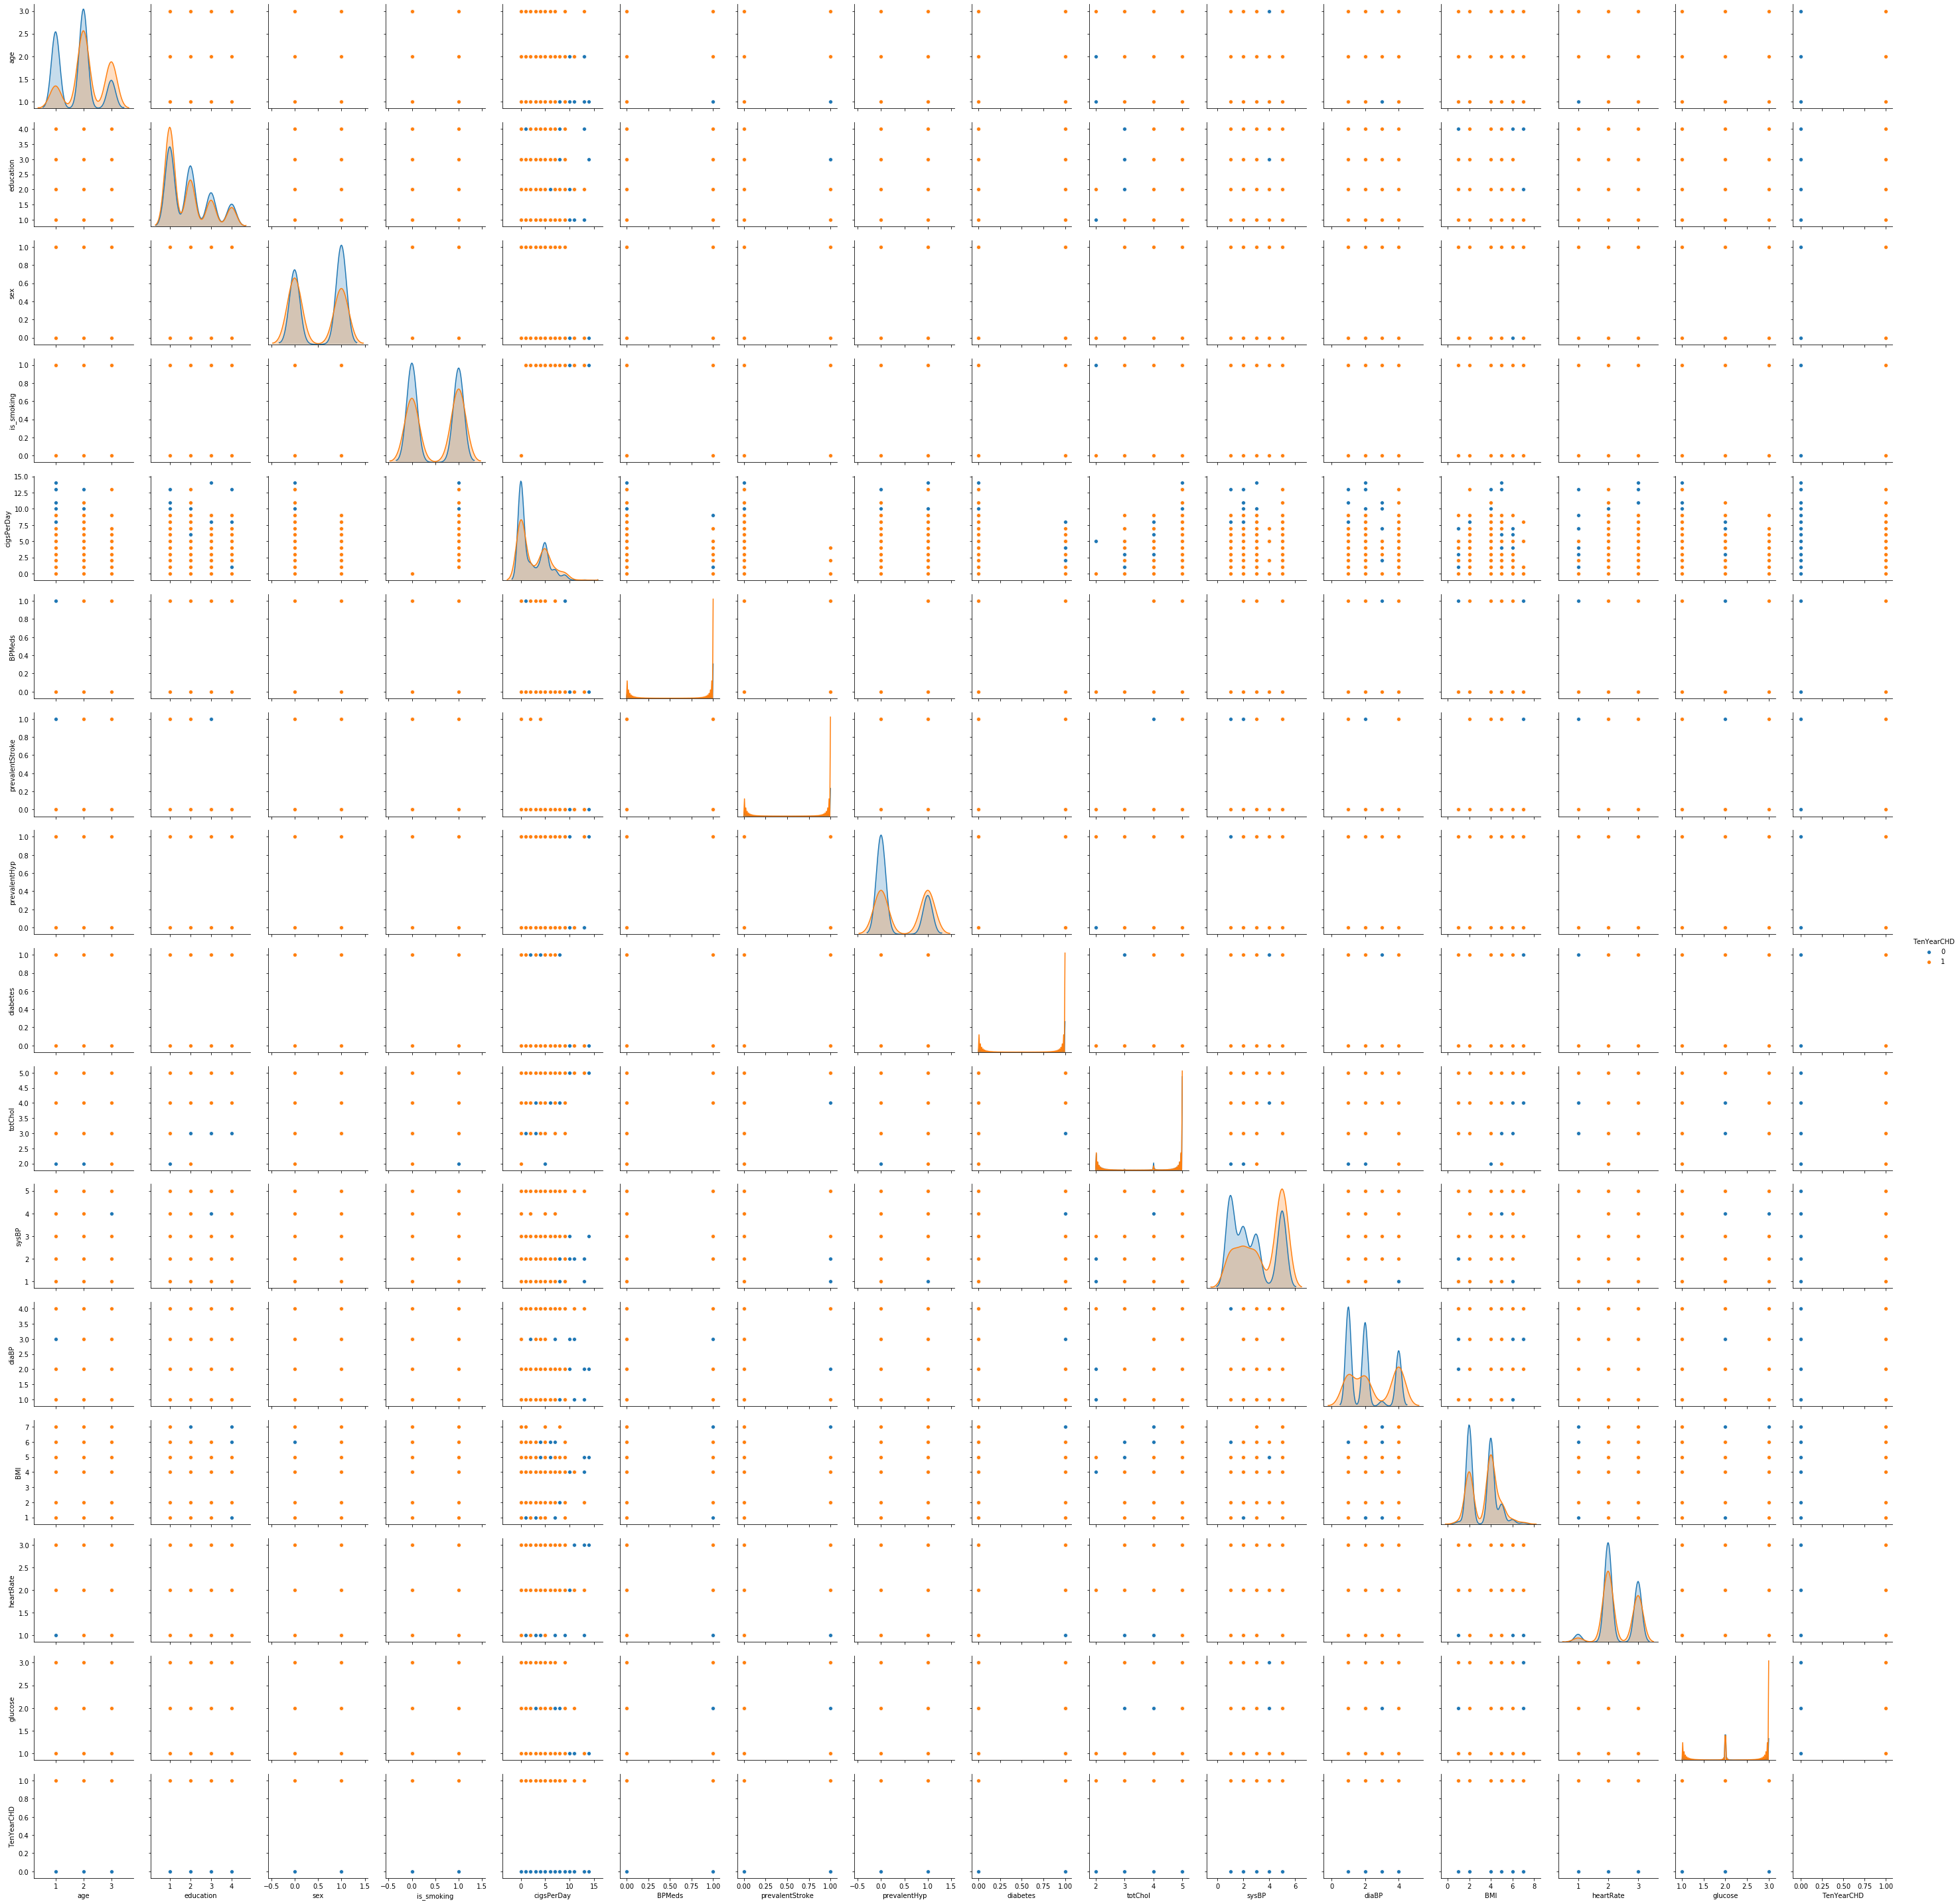

In [541]:
"""
Exploring graphically the data
"""
X_cols = list(df.columns.values[:])
# X_cols.append('TenYearCHD')
X_cols.remove('id')
fig = plt.figure(1)
sns.pairplot(df[X_cols],hue='TenYearCHD')

In [360]:
figure = plt.gcf()  # get current figure
figure.set_size_inches(20, 10)
plt.savefig('.\cardiovascular\pairplot_{0}.jpg'.format('full'), bbox_inches='tight', dpi=100)

<Figure size 1440x720 with 0 Axes>

In [542]:
df.columns.values[:]

array(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype=object)

C:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


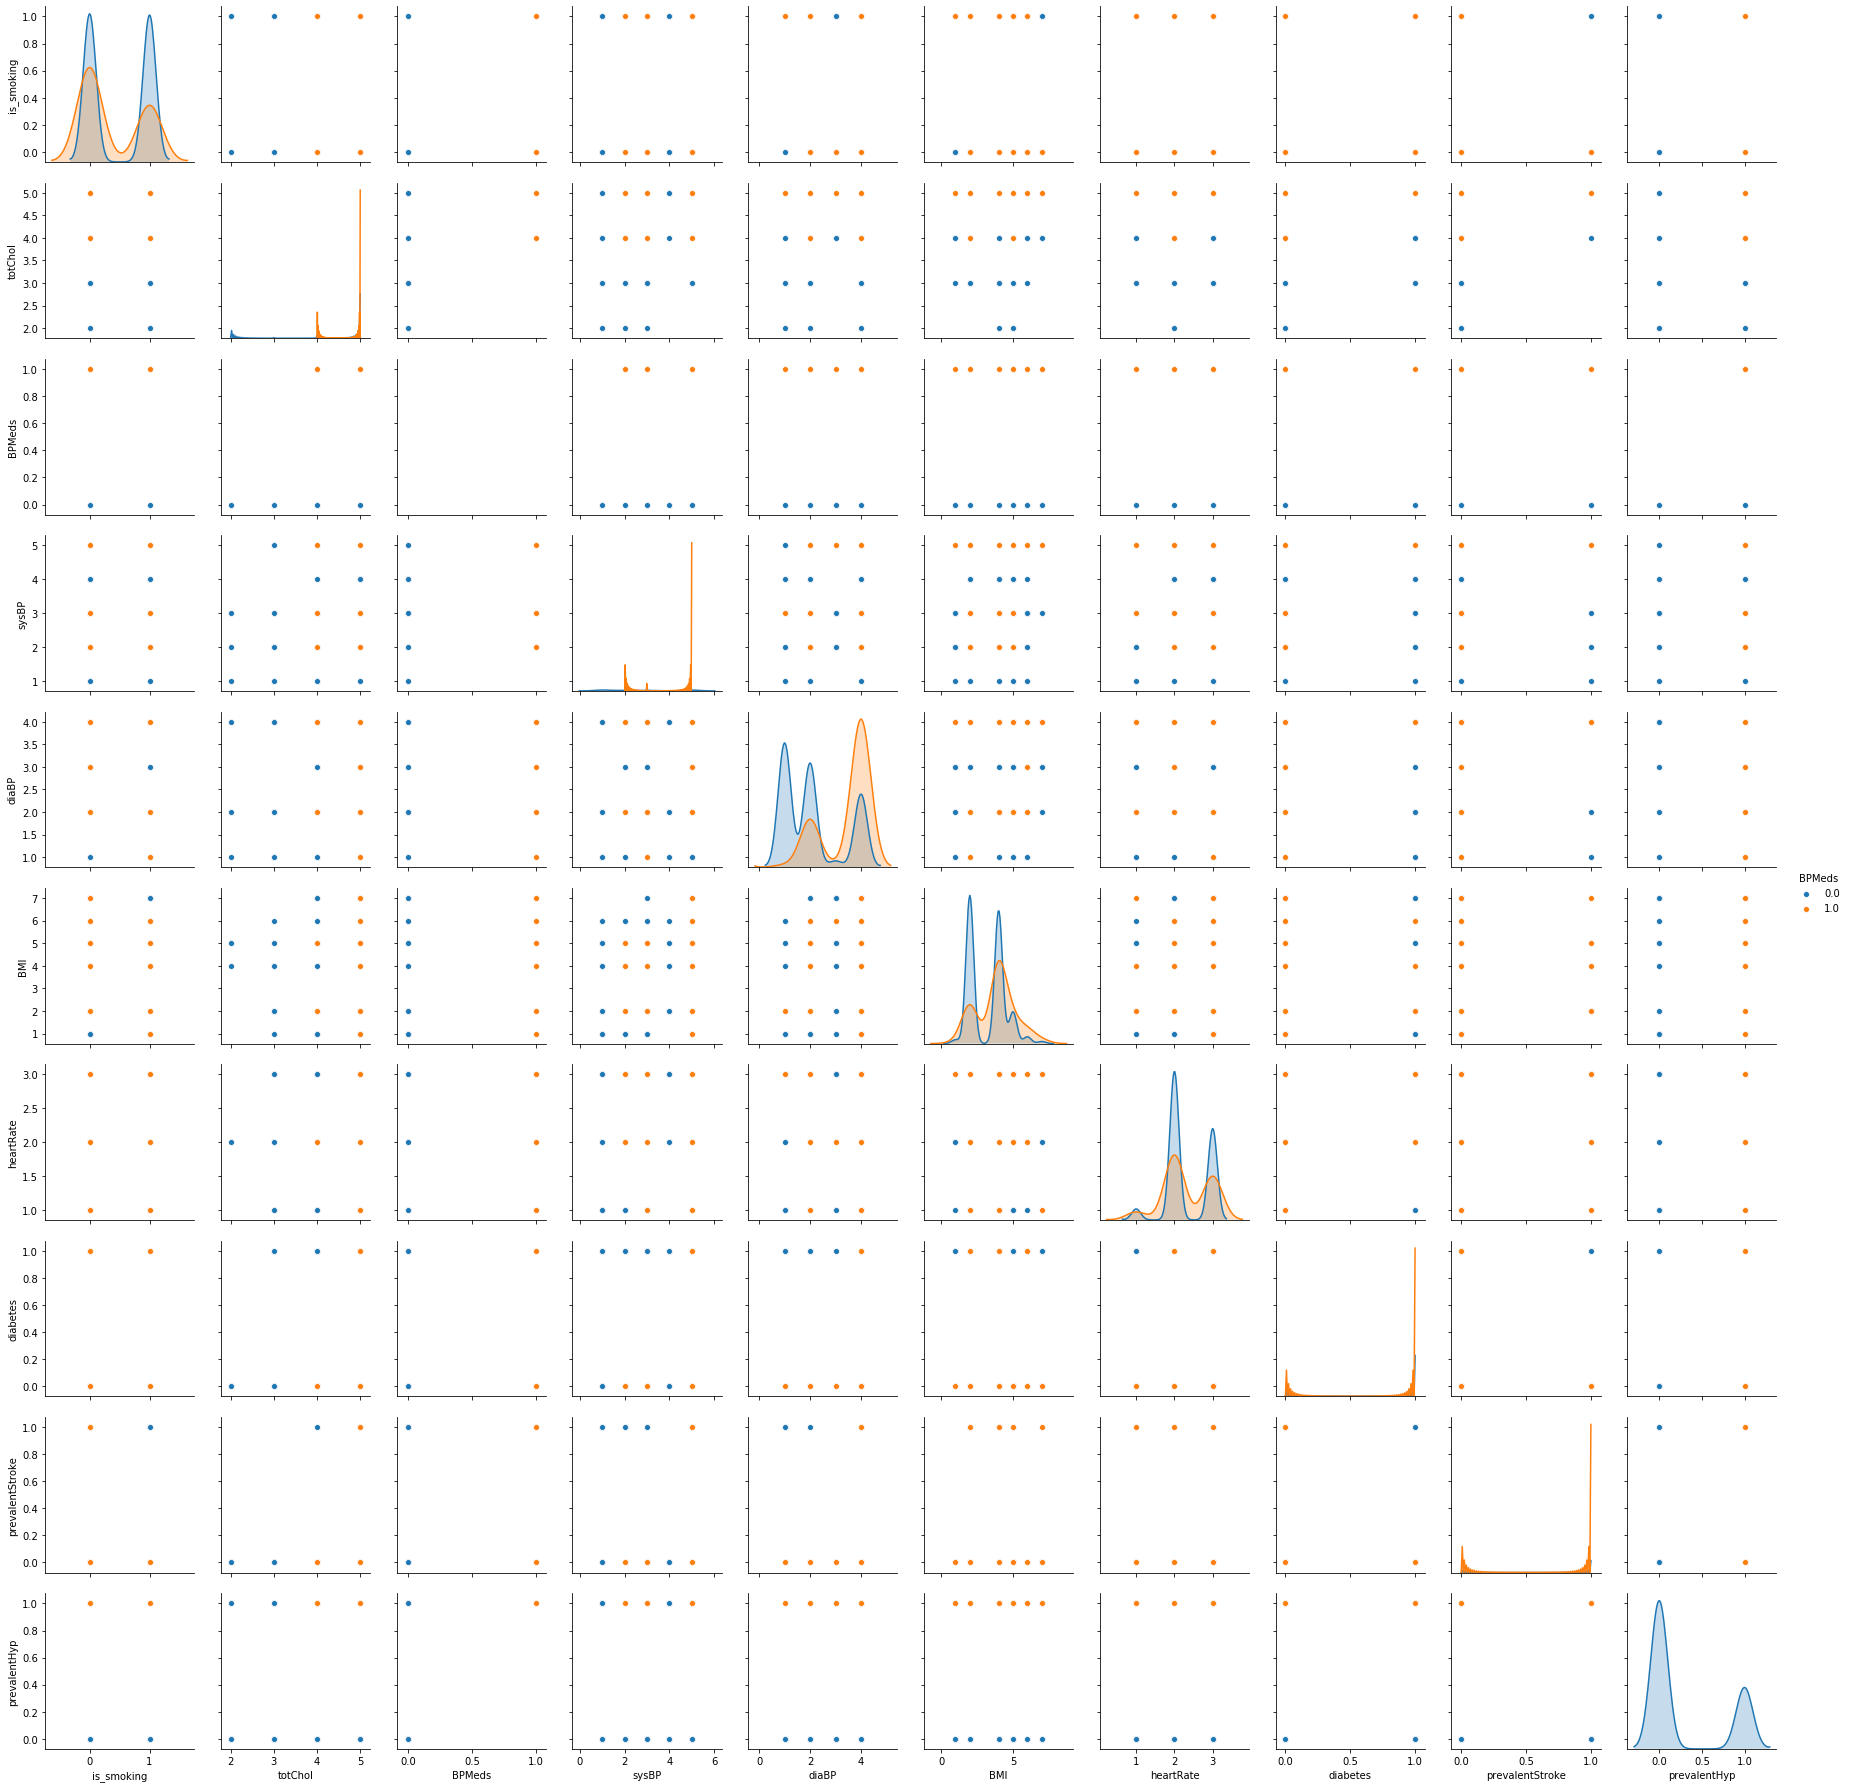

In [633]:
"""
Exploring graphically the smoking relationship with other variables
['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay','BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
"""
X_cols = ['is_smoking', 'totChol', 'BPMeds','sysBP', 'diaBP', 'BMI', 'heartRate','diabetes', 'prevalentStroke','prevalentHyp']
sns.pairplot(df[X_cols],hue='BPMeds')

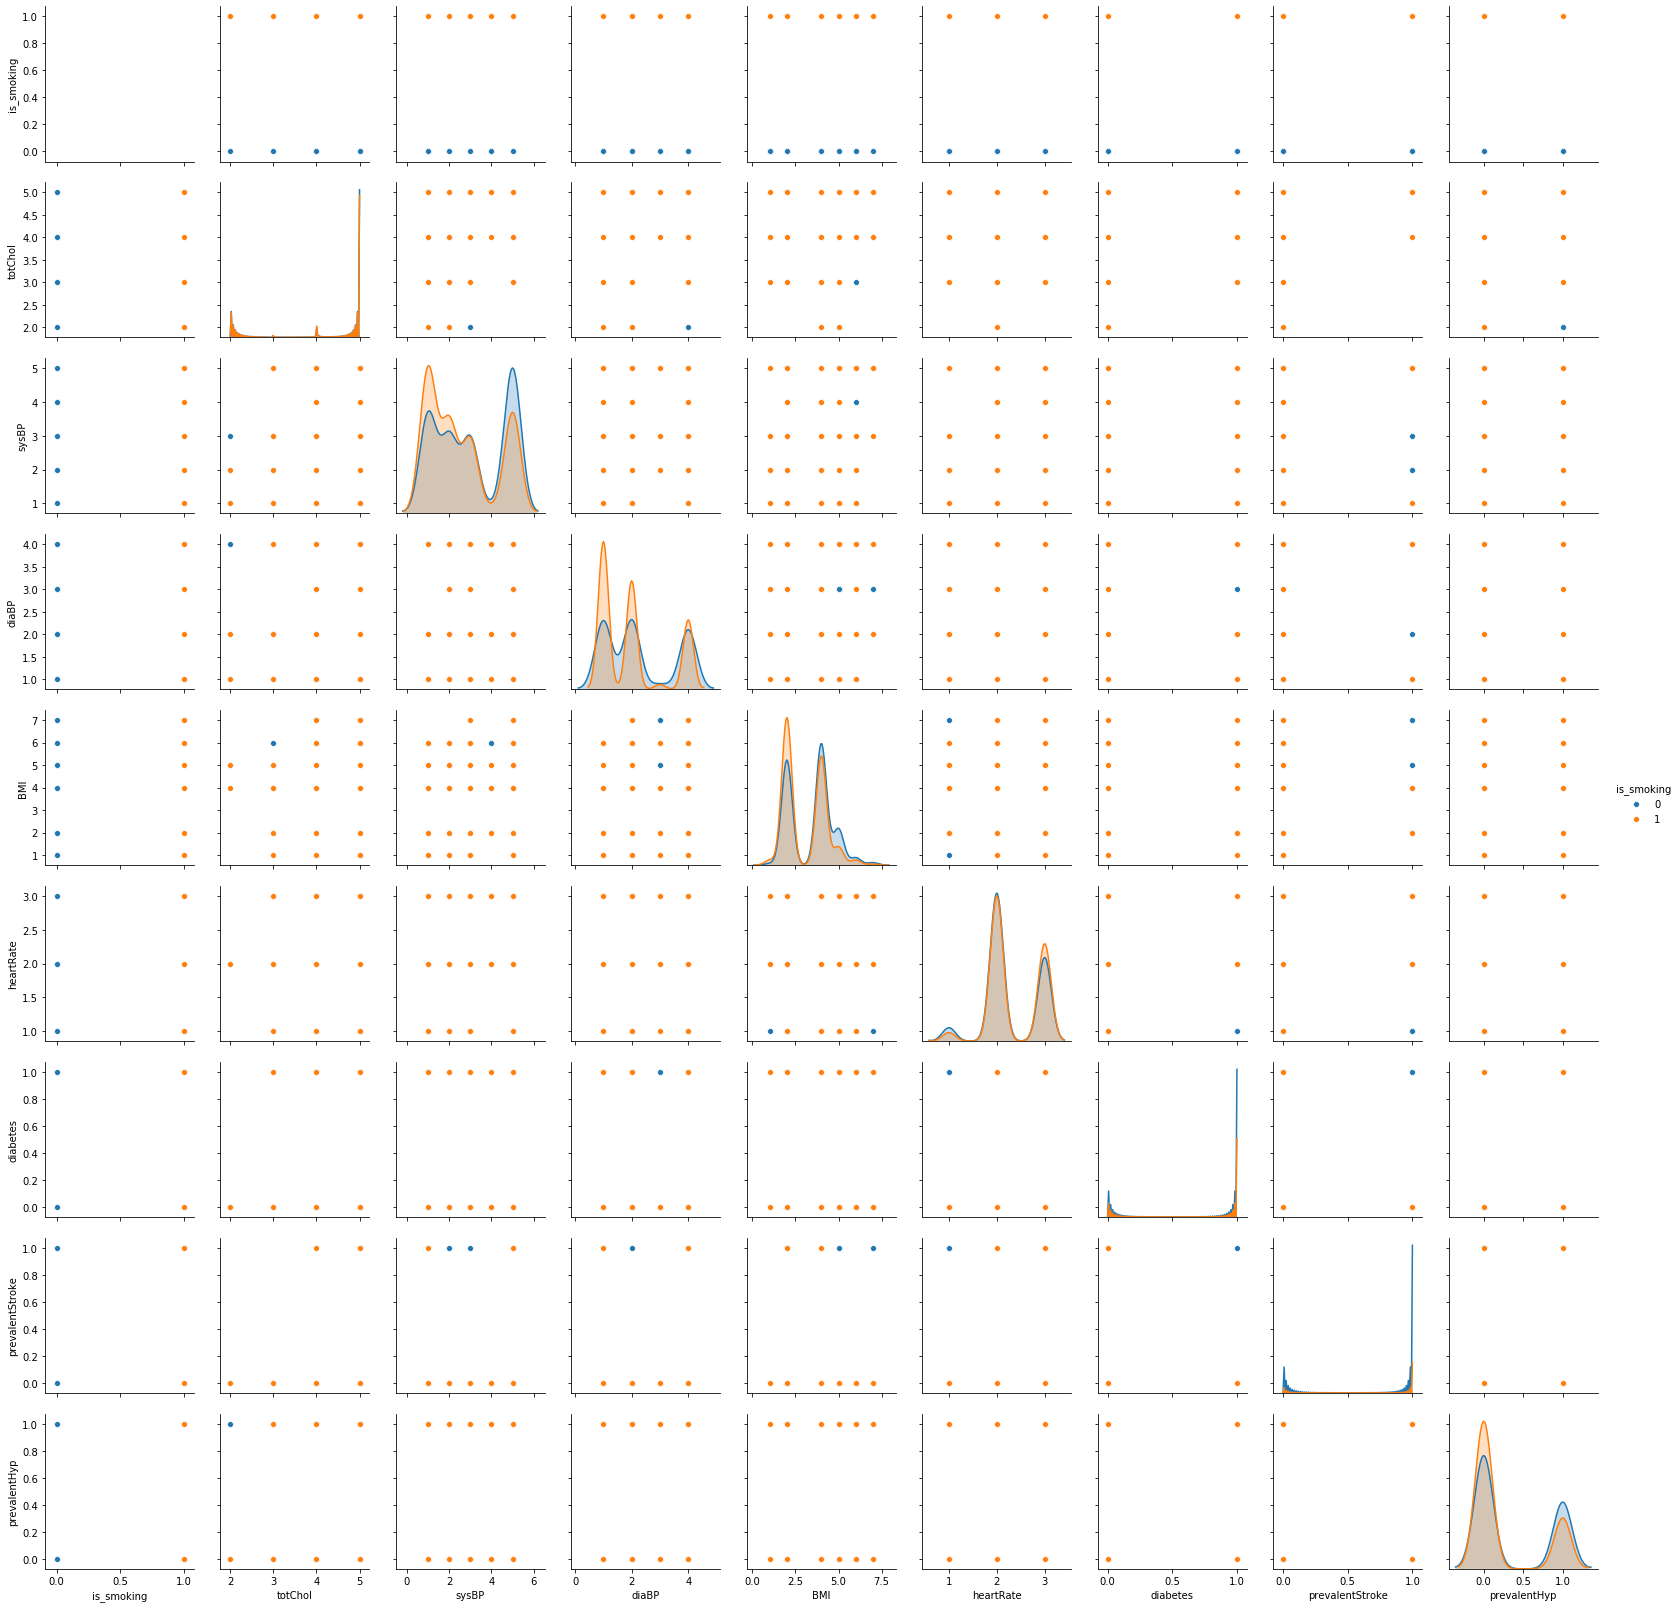

In [544]:
"""
Exploring graphically the smoking relationship with other variables
['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay','BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
"""
X_cols = ['is_smoking', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate','diabetes', 'prevalentStroke','prevalentHyp']
sns.pairplot(df[X_cols],hue='is_smoking')

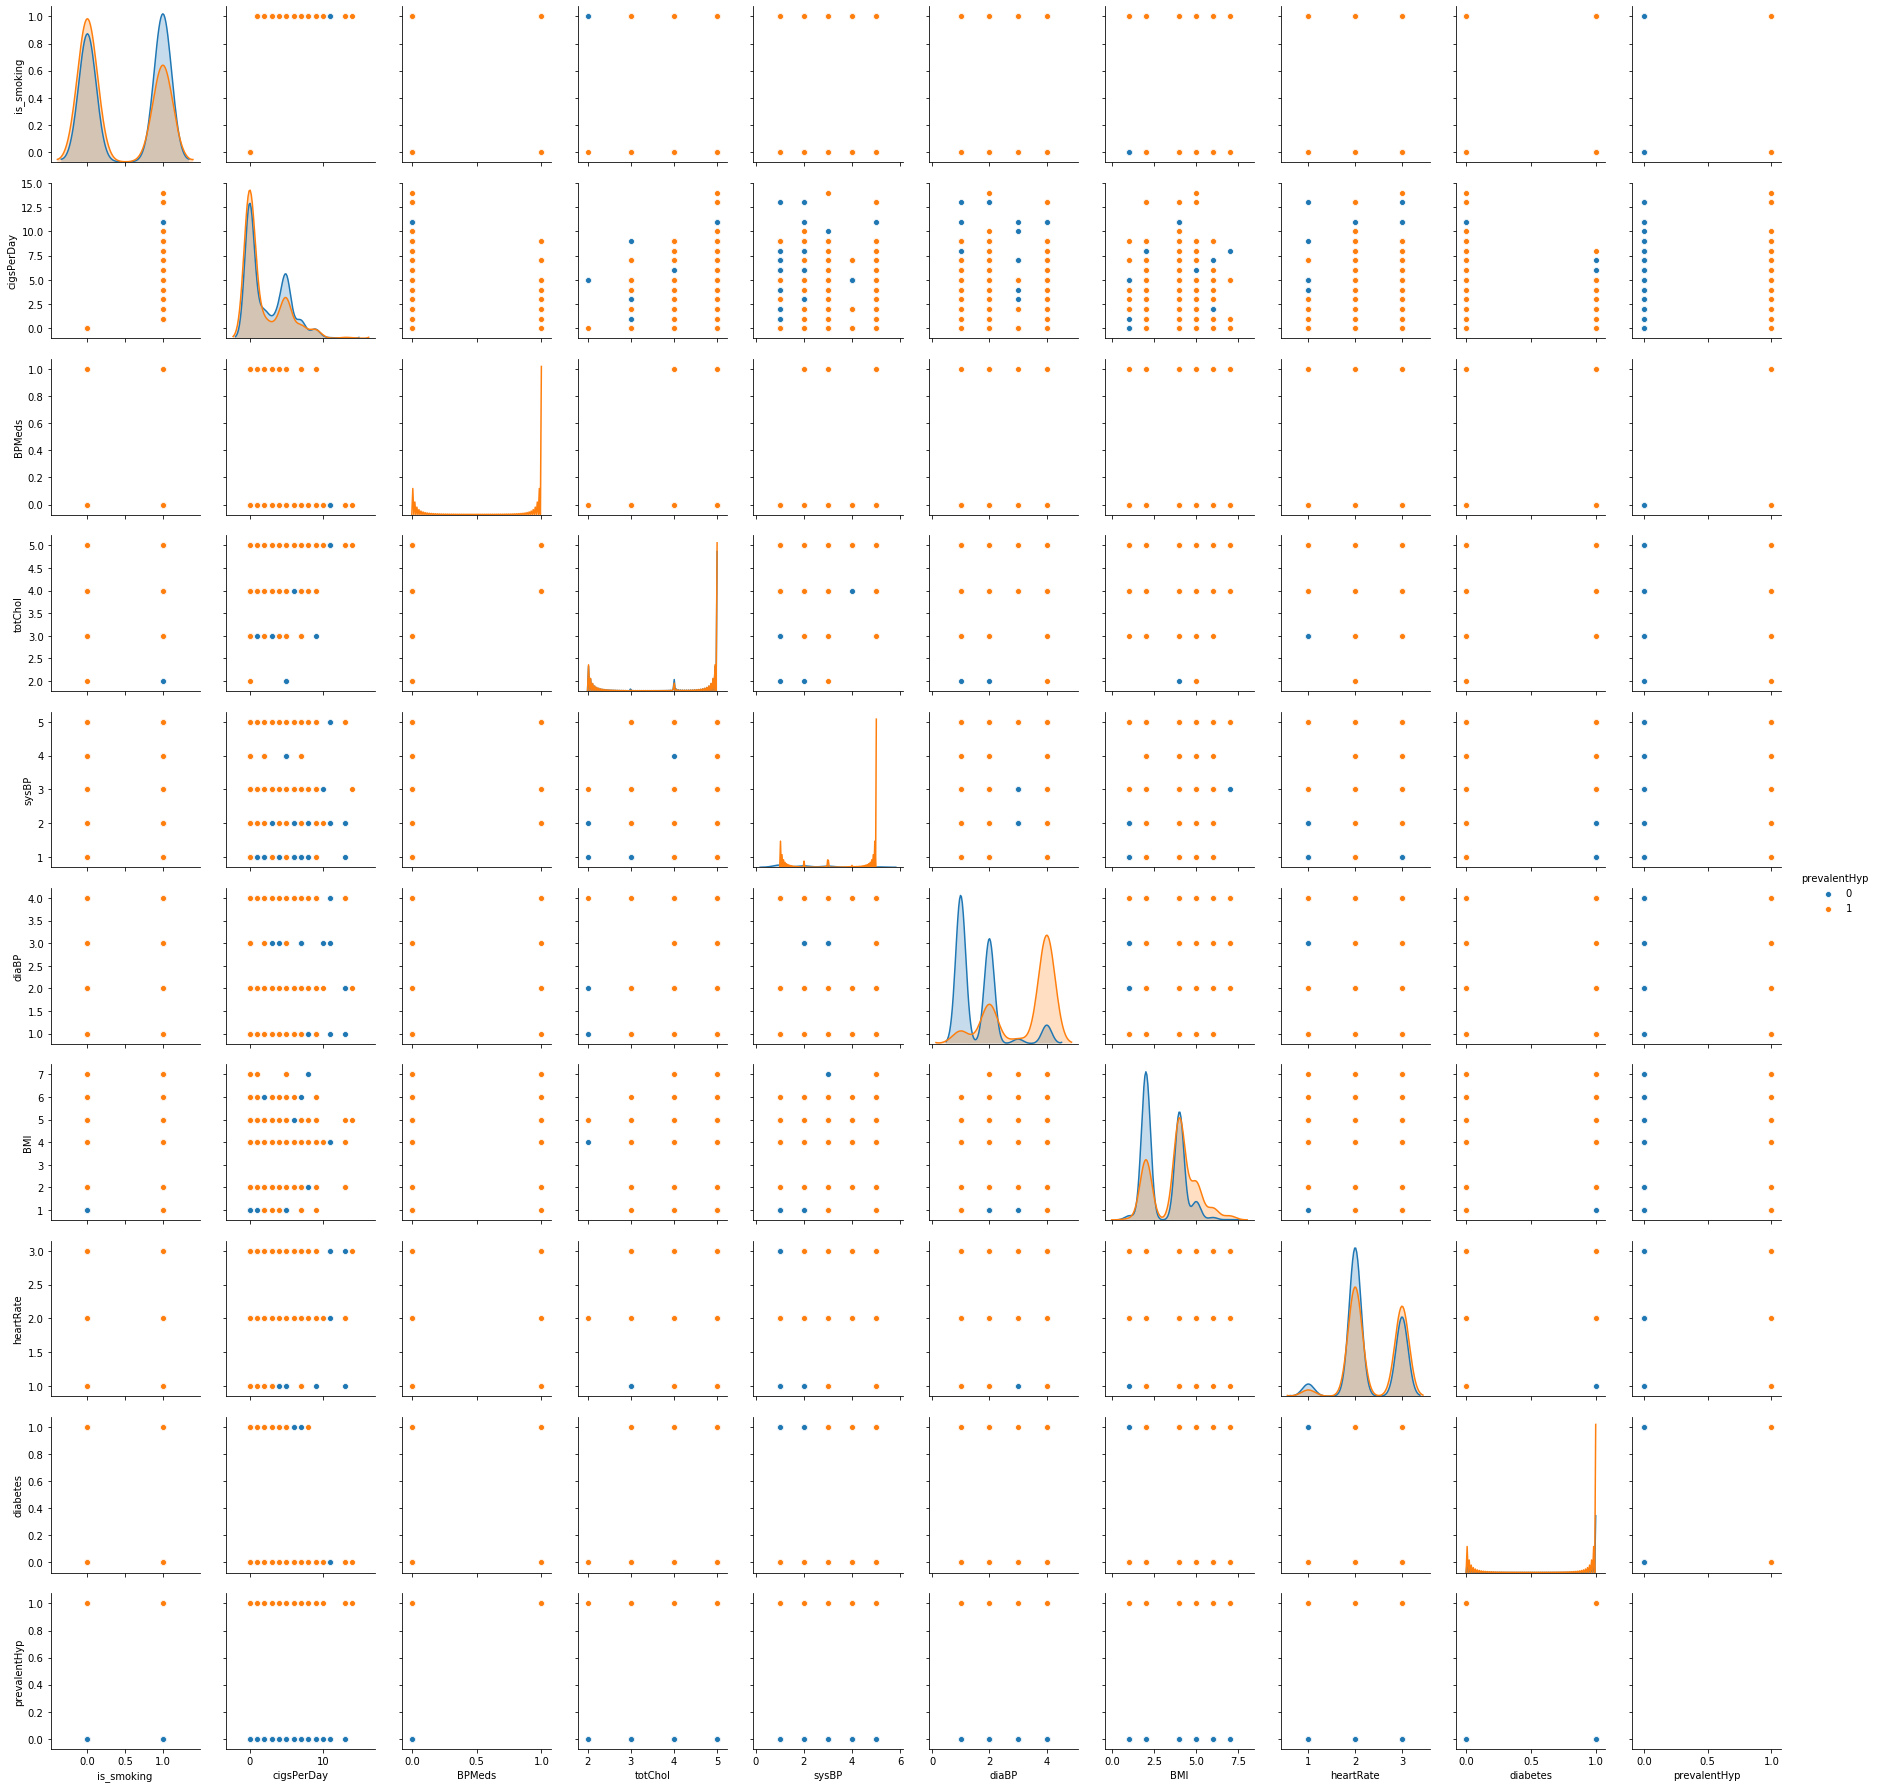

In [545]:
"""
Exploring graphically the data
['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay','BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
"""
X_cols = ['is_smoking', 'cigsPerDay','BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate','diabetes', 'prevalentHyp']
sns.pairplot(df[X_cols],hue='prevalentHyp')

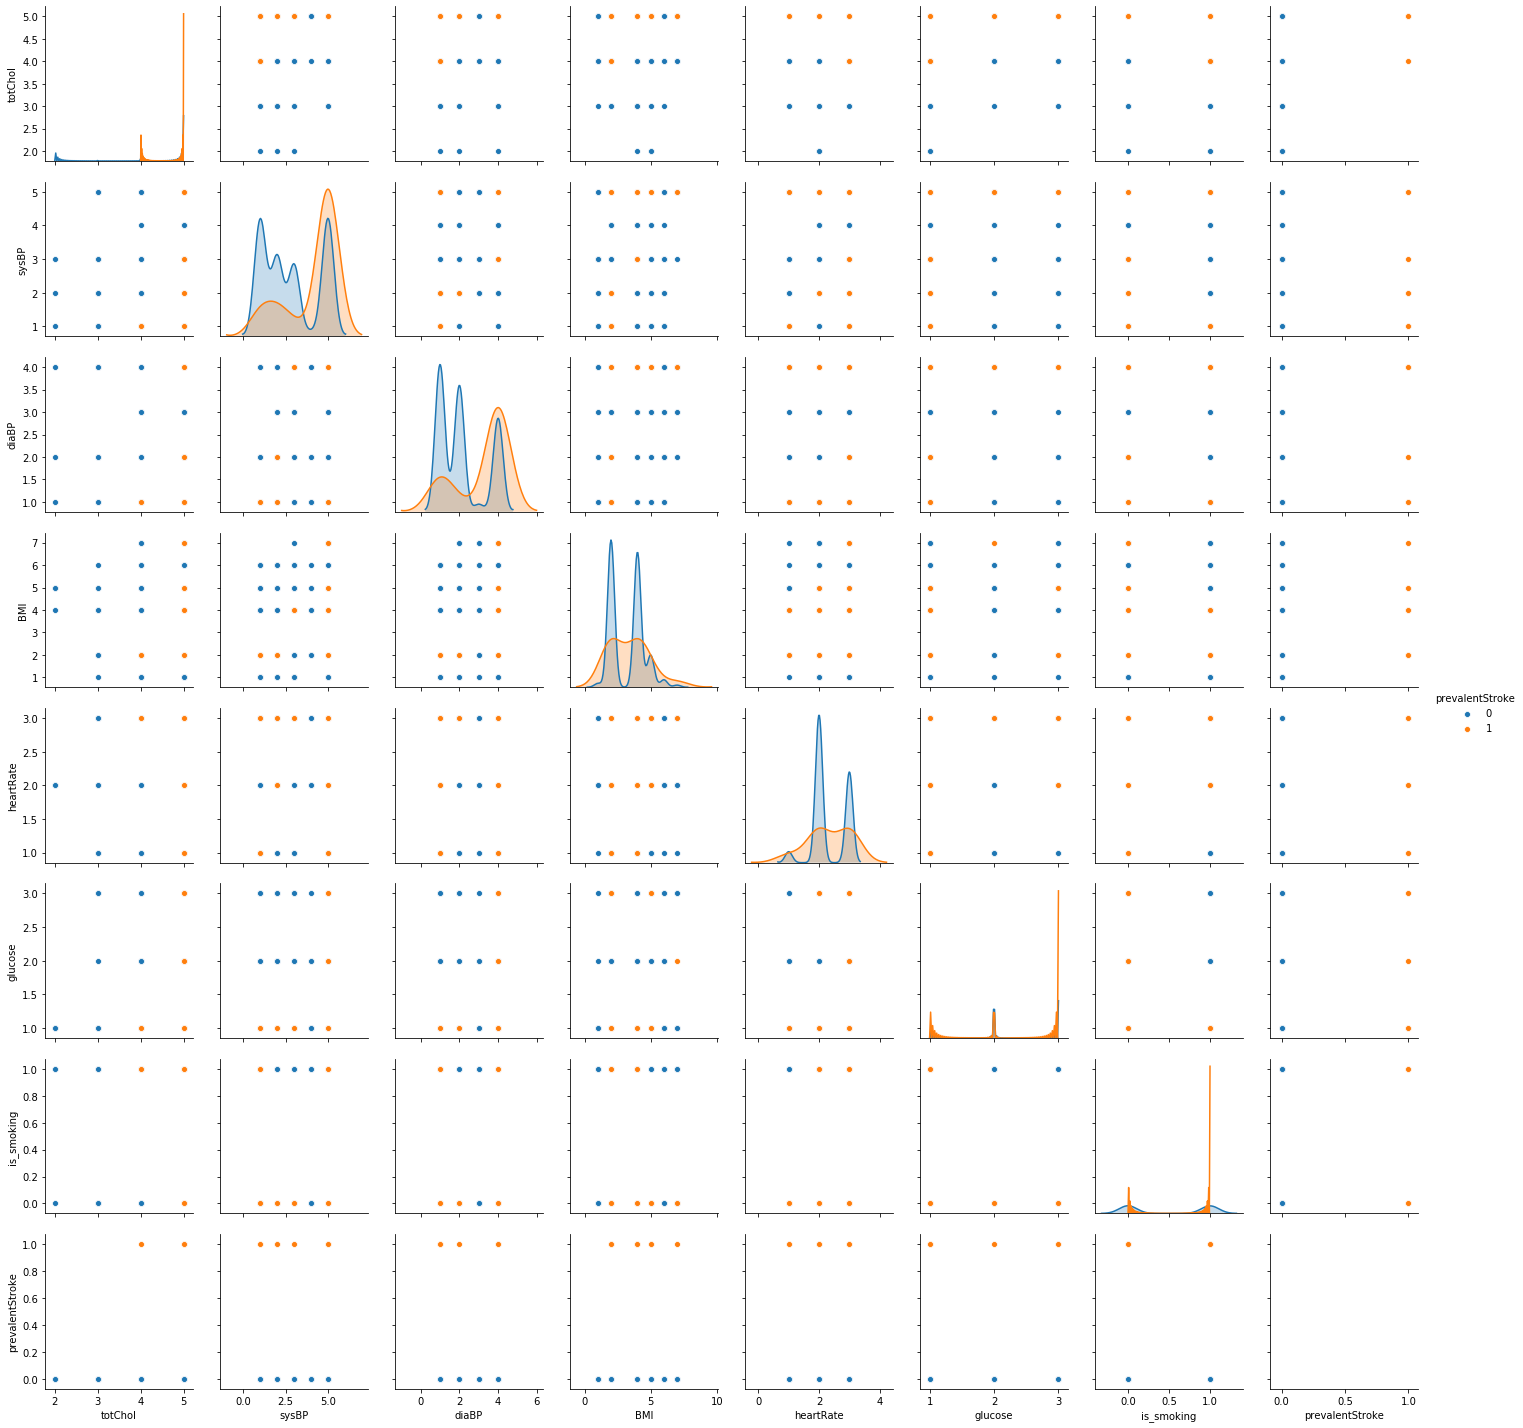

In [546]:
"""
Exploring graphically the data
['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay','BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
"""
X_cols = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','is_smoking','prevalentStroke']
sns.pairplot(df[X_cols],hue='prevalentStroke')

## 2. Probabilistic graphical model proposal

Once you describe the problem, you should propose a PGM that attempts to model the situation of interest. This model can come from various sources:

- The knowledge of an expert.
- Your own knowledge.
- Literature.
- A structure learning scheme.

In any case, you must document the whole process of construction of the model.

In [480]:
# Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score)
from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler

In [550]:
"""
Training and Testing spliting data
Variables:
['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay','BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
"""
feat_ = list(df.columns.values[:])
# feat_.remove('id')
feat_.remove('TenYearCHD')

Y = df['TenYearCHD'].copy()
X_1 = df[['age', 'education','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']].copy()
X_1 -= 1
X_1['id'] = df['id'].copy()
X_2 = df[['id','sex', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes','is_smoking','cigsPerDay']].copy()
X = pd.merge(X_1, X_2, on='id')
X = X.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, shuffle=True)

train = X_train.copy()
train['TenYearCHD'] = y_train.values.copy()
test = X_test.copy()
test['TenYearCHD'] = y_test.values.copy()

In [551]:
X.head()

,age,education,totChol,sysBP,diaBP,BMI,heartRate,glucose,id,sex,BPMeds,prevalentStroke,prevalentHyp,diabetes,is_smoking,cigsPerDay
0,0,3,4,4,3,3,1,0,1,0,0,0,1,0,0,0
1,1,0,4,0,0,1,2,0,2,1,0,0,0,0,1,3
2,1,0,4,4,1,3,1,0,3,0,0,0,1,0,1,5
3,2,0,4,2,1,3,1,0,4,1,0,0,0,0,1,7
4,2,2,4,4,3,4,2,0,5,1,0,0,1,0,0,0


In [552]:
df.describe()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000
mean,1692.869833,1.823369,1.965494,0.553468,0.494363,2.257260,0.030065,0.006150,0.314315,0.026990,4.850359,2.823369,2.133242,3.233003,2.319781,1.119918,0.151691
std,986.025198,0.689656,1.017199,0.497218,0.500054,2.764095,0.170795,0.078192,0.464322,0.162082,0.415217,1.612884,1.185184,1.248251,0.553583,0.403720,0.358783
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,836.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,1689.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,2.000000,4.000000,2.000000,1.000000,0.000000
75%,2547.500000,2.000000,3.000000,1.000000,1.000000,5.000000,0.000000,0.000000,1.000000,0.000000,5.000000,5.000000,4.000000,4.000000,3.000000,1.000000,0.000000
max,3389.000000,3.000000,4.000000,1.000000,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,4.000000,7.000000,3.000000,3.000000,1.000000


**Model proposed by us**

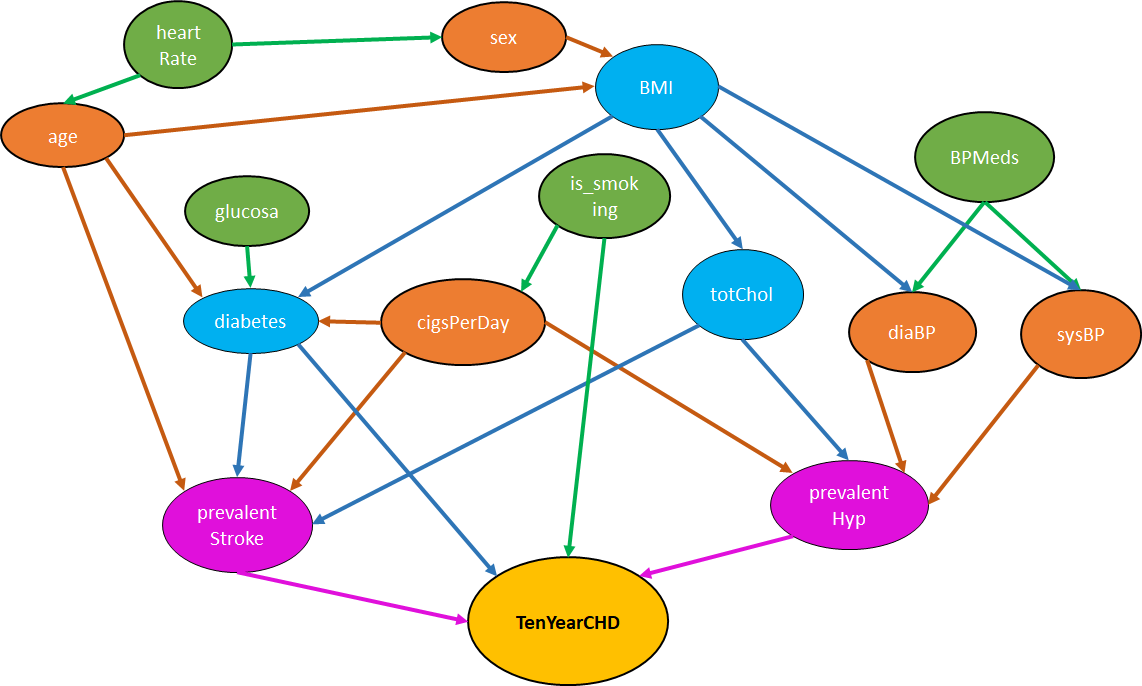

In [606]:
from IPython.display import Image
Image(r'.\cardiovascular\cardiovascular_bayesian_network_us.png')

# Model proposed with assistance of an Expert

**Sources given by the expert**

- $\text{https://www.diabetes.org/a1c/diagnosis}$

- $\text{https://www.heart.org/en/health-topics/high-blood-pressure}$

- $\text{https://www.heart.org/en/health-topics/high-blood-pressure}$

- $\text{https://www.cdc.gov/obesity/adult/defining.html}$

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.diabetes.org/sites/default/files/styles/750_width/public/2019-08/ADA_2019_web_images_216x241px_FPG.png" width="200px" height="100px" />

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.diabetes.org/sites/default/files/styles/750_width/public/2019-08/ADA_2019_web_images_216x241px_OGTT.png" width="200px" height="100px" />

<img style="float: left; margin: 0px 0px 15px 15px;" src="https://www.heart.org/-/media/data-import/images/4/8/2/2_image2-health-threats-diagram-ucm_489361.png?la=en&hash=9D6DD309F3485E87335A7E210B3C40D0F4634790" width="300px" height="200px" />

<img style="float: left; margin: 0px 0px 15px 15px;" src="https://www.marathonranking.com/wp-content/uploads/2016/08/pulsaciones-en-reposo-mujer-hombre.png" width="400px" height="300px" />
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.heart.org/-/media/images/health-topics/high-blood-pressure/rainbow-chart/blood-pressure-readings-chart.jpg?h=294&la=en&mw=440&w=440&hash=B8A1E58AC7E5CD5D1CA78C2D090E0F5EA500D653" width="400px" height="300px" />

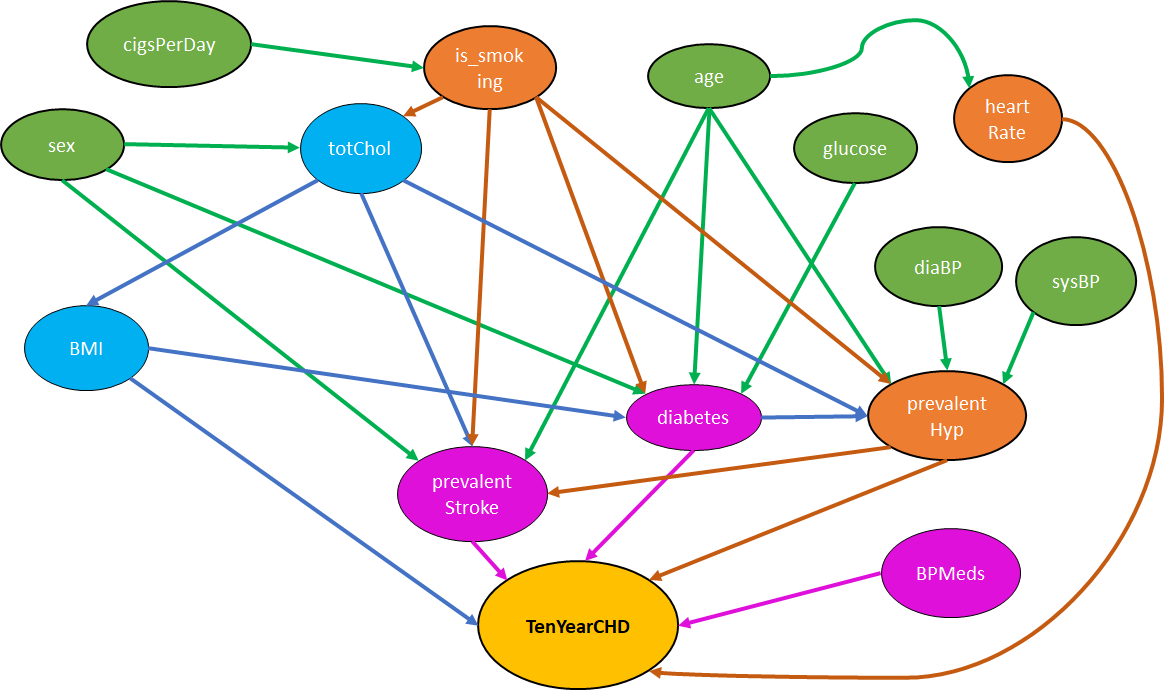

In [605]:
Image(r'.\cardiovascular\cardiovascular_bayesian_network_expert.png')

## 3. Model evaluation

The problem might provide an inherent evaluation metric for the model you propose. If this is not the case, you should propose a metric to evaluate your model and justify why it is a proper metric for the specific problem you are trying to solve.

According to this metric, you should evaluate your model. You may use a benchmark model for comparison purposes.

**Models Evaluation**

1 - $\text{Model Designed with an expert}$

2 - $\text{Model Designed by us}$

3 - $\text{Benchmark model to compare}$

In [639]:
"""
Bayesian Network Designed with the assistance of an expert
Variables:
'id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay','BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'
"""
from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import BayesianModel
# Defining the model structure. We can define the network by just passing a list of edges.
model = BayesianModel([('sex','totChol'),('sex','prevalentStroke'),('sex','diabetes'),
                       ('age', 'prevalentStroke'),('age', 'diabetes'),('age', 'prevalentHyp'),('age', 'heartRate'), 
                       ('cigsPerDay','is_smoking'),
                       ('glucose', 'diabetes'), 
                       ('diaBP', 'prevalentHyp'),('diaBP', 'prevalentStroke'),
                       ('sysBP', 'prevalentHyp'),('sysBP', 'prevalentStroke'),
                       ('is_smoking', 'totChol'),('is_smoking', 'prevalentStroke'),('is_smoking', 'diabetes'),
                           ('is_smoking', 'prevalentHyp'),
                       ('prevalentHyp', 'prevalentStroke'),('prevalentHyp', 'TenYearCHD'),
                       ('totChol', 'BMI'),('totChol', 'prevalentStroke'),('totChol', 'prevalentHyp'),
                       ('BMI', 'diabetes'),('BMI', 'TenYearCHD'),
                       ('heartRate','TenYearCHD'),
                       ('prevalentStroke', 'diabetes'),('prevalentStroke', 'TenYearCHD'),
                       ('diabetes', 'TenYearCHD'),
                       ('BPMeds', 'TenYearCHD')
                       # ('education', 'TenYearCHD')
                      ])

In [640]:
# Train model
model.fit(train)

In [641]:
model.check_model()
# model.get_independencies()

True

In [613]:
"""
Bayesian model designed by US
"""
model_us = BayesianModel([('heartRate','age'),('heartRate','sex'), 
                          ('sex', 'BMI'),
                          ('age', 'prevalentStroke'),('age', 'diabetes'),('age', 'BMI'), 
                          ('is_smoking', 'cigsPerDay'),('is_smoking', 'TenYearCHD'),
                          ('glucose', 'diabetes'), 
                          ('BPMeds', 'diaBP'),('BPMeds', 'sysBP'),
                          ('BMI', 'diabetes'),('BMI', 'totChol'),('BMI', 'sysBP'),('BMI', 'diaBP'),
                          ('diabetes', 'prevalentStroke'),('diabetes', 'TenYearCHD'),
                          ('totChol', 'prevalentStroke'),('totChol', 'prevalentHyp'),
                          ('diaBP', 'prevalentHyp'),
                          ('sysBP', 'prevalentHyp'),
                          ('cigsPerDay','prevalentStroke'),('cigsPerDay', 'prevalentHyp'),('cigsPerDay', 'diabetes'),
                          ('prevalentStroke', 'TenYearCHD'),
                          ('prevalentHyp', 'TenYearCHD'),
                       # ('education', 'TenYearCHD')
                      ])

In [614]:
# Train model
model_us.fit(train)
model_us.check_model()

True

In [616]:
"""
Compare results of Bayesian network vs other Decision Tree for Classification
"""
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.metrics import (accuracy_score,precision_score,recall_score)


modelo = DecisionTreeClassifier(criterion='gini',
                                splitter='best',
                                max_depth=23)
modelo = modelo.fit(X_train,y_train)

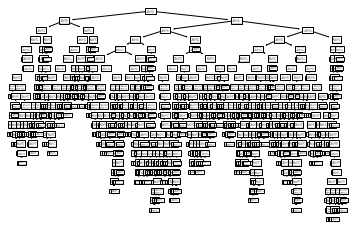

In [617]:
#%% Visualizar el arbol de decision
from sklearn import tree
tree.plot_tree(modelo)
plt.show()

**Perform the prediction of the models**

In [642]:
"""
Bayesian model with Expert assistance
Prediction performing with "test" data
"""
pred_var = list(model.node)
pred_var.remove('TenYearCHD')
# pred_var
y_pred_expert= model.predict(test[pred_var])







  0%|                                                                                          | 0/473 [00:00<?, ?it/s]





  0%|▏                                                                                 | 1/473 [00:00<02:48,  2.80it/s]





  3%|██▋                                                                              | 16/473 [00:13<03:54,  1.95it/s]





  4%|██▉                                                                              | 17/473 [00:13<03:08,  2.42it/s]





  4%|███                                                                              | 18/473 [00:13<02:30,  3.03it/s]





  4%|███▍                                                                             | 20/473 [00:13<01:53,  3.98it/s]





  4%|███▌                                                                             | 21/473 [00:14<01:48,  4.15it/s]





  5%|███▊                                                                             | 22/473 [00:14<01:44,  4.31it/s]

 19%|███████████████▌                                                                 | 91/473 [00:47<03:03,  2.08it/s]





 19%|███████████████▊                                                                 | 92/473 [00:47<02:38,  2.41it/s]





 20%|███████████████▉                                                                 | 93/473 [00:47<02:06,  3.00it/s]





 20%|████████████████                                                                 | 94/473 [00:47<01:55,  3.29it/s]





 20%|████████████████▎                                                                | 95/473 [00:49<04:07,  1.53it/s]





 21%|████████████████▌                                                                | 97/473 [00:49<03:22,  1.86it/s]





 21%|████████████████▊                                                                | 98/473 [00:49<02:43,  2.30it/s]





 21%|████████████████▉                                                                | 99/473 [00:50<02:56,  2.11it/s]







 34%|███████████████████████████▌                                                    | 163/473 [01:25<03:17,  1.57it/s]





 35%|███████████████████████████▋                                                    | 164/473 [01:26<02:52,  1.79it/s]





 35%|███████████████████████████▉                                                    | 165/473 [01:26<02:18,  2.22it/s]





 35%|████████████████████████████                                                    | 166/473 [01:26<02:19,  2.20it/s]





 35%|████████████████████████████▏                                                   | 167/473 [01:27<02:15,  2.26it/s]





 36%|████████████████████████████▍                                                   | 168/473 [01:28<03:22,  1.51it/s]





 36%|████████████████████████████▌                                                   | 169/473 [01:29<03:40,  1.38it/s]





 36%|████████████████████████████▊                                                   | 170/473 [01:29<03:20,  1.51it/s]







 49%|███████████████████████████████████████▌                                        | 234/473 [02:02<02:40,  1.49it/s]





 50%|███████████████████████████████████████▋                                        | 235/473 [02:02<02:05,  1.90it/s]





 50%|███████████████████████████████████████▉                                        | 236/473 [02:02<01:49,  2.16it/s]





 50%|████████████████████████████████████████                                        | 237/473 [02:03<02:18,  1.70it/s]





 50%|████████████████████████████████████████▎                                       | 238/473 [02:04<02:10,  1.80it/s]





 51%|████████████████████████████████████████▍                                       | 239/473 [02:04<02:05,  1.86it/s]





 51%|████████████████████████████████████████▌                                       | 240/473 [02:04<01:54,  2.04it/s]





 51%|████████████████████████████████████████▊                                       | 241/473 [02:05<01:45,  2.21it/s]







 65%|████████████████████████████████████████████████████                            | 308/473 [02:36<01:19,  2.08it/s]





 65%|████████████████████████████████████████████████████▎                           | 309/473 [02:36<01:01,  2.66it/s]





 66%|████████████████████████████████████████████████████▍                           | 310/473 [02:36<01:08,  2.37it/s]





 66%|████████████████████████████████████████████████████▌                           | 311/473 [02:37<01:29,  1.81it/s]





 66%|████████████████████████████████████████████████████▊                           | 312/473 [02:38<01:39,  1.62it/s]





 66%|█████████████████████████████████████████████████████                           | 314/473 [02:38<01:15,  2.09it/s]





 67%|█████████████████████████████████████████████████████▍                          | 316/473 [02:39<01:10,  2.24it/s]





 67%|█████████████████████████████████████████████████████▌                          | 317/473 [02:39<00:56,  2.75it/s]







 82%|█████████████████████████████████████████████████████████████████▎              | 386/473 [03:14<00:43,  1.98it/s]





 82%|█████████████████████████████████████████████████████████████████▍              | 387/473 [03:15<00:40,  2.10it/s]





 82%|█████████████████████████████████████████████████████████████████▌              | 388/473 [03:15<00:34,  2.50it/s]





 82%|█████████████████████████████████████████████████████████████████▉              | 390/473 [03:16<00:40,  2.06it/s]





 83%|██████████████████████████████████████████████████████████████████▏             | 391/473 [03:17<00:51,  1.59it/s]





 83%|██████████████████████████████████████████████████████████████████▎             | 392/473 [03:18<00:47,  1.72it/s]





 83%|██████████████████████████████████████████████████████████████████▍             | 393/473 [03:18<00:44,  1.81it/s]





 83%|██████████████████████████████████████████████████████████████████▋             | 394/473 [03:19<00:41,  1.89it/s]







 98%|██████████████████████████████████████████████████████████████████████████████▎ | 463/473 [03:55<00:06,  1.66it/s]





 98%|██████████████████████████████████████████████████████████████████████████████▍ | 464/473 [03:55<00:05,  1.75it/s]





 98%|██████████████████████████████████████████████████████████████████████████████▋ | 465/473 [03:55<00:04,  1.98it/s]





 99%|██████████████████████████████████████████████████████████████████████████████▊ | 466/473 [03:57<00:04,  1.45it/s]





 99%|██████████████████████████████████████████████████████████████████████████████▉ | 467/473 [03:57<00:03,  1.63it/s]





 99%|███████████████████████████████████████████████████████████████████████████████▎| 469/473 [03:57<00:01,  2.13it/s]





 99%|███████████████████████████████████████████████████████████████████████████████▍| 470/473 [03:57<00:01,  2.54it/s]





100%|███████████████████████████████████████████████████████████████████████████████▋| 471/473 [03:58<00:00,  2.81it/s]







In [624]:
"""
Bayesian model designed by US
Prediction performing with "test" data
"""
pred_var = list(model_us.node)
pred_var.remove('TenYearCHD')
# pred_var
y_pred_us= model_us.predict(test[pred_var])







  0%|                                                                                          | 0/473 [00:00<?, ?it/s]





  3%|██▋                                                                              | 16/473 [00:00<00:25, 17.73it/s]





  4%|██▉                                                                              | 17/473 [00:01<00:39, 11.43it/s]





  4%|███                                                                              | 18/473 [00:01<00:49,  9.20it/s]





  4%|███▍                                                                             | 20/473 [00:01<00:50,  9.02it/s]





  4%|███▌                                                                             | 21/473 [00:01<00:49,  9.09it/s]





  5%|███▊                                                                             | 22/473 [00:01<00:50,  8.91it/s]





  5%|████                                                                             | 24/473 [00:01<00:45,  9.95it/s]

 28%|██████████████████████▏                                                         | 131/473 [00:15<01:07,  5.05it/s]





 28%|██████████████████████▍                                                         | 133/473 [00:15<00:54,  6.24it/s]





 28%|██████████████████████▋                                                         | 134/473 [00:15<01:17,  4.38it/s]





 29%|███████████████████████                                                         | 136/473 [00:16<01:03,  5.31it/s]





 29%|███████████████████████▎                                                        | 138/473 [00:16<00:57,  5.81it/s]





 30%|███████████████████████▋                                                        | 140/473 [00:16<00:56,  5.90it/s]





 30%|███████████████████████▊                                                        | 141/473 [00:17<01:04,  5.17it/s]





 30%|████████████████████████                                                        | 142/473 [00:17<00:56,  5.82it/s]







 53%|██████████████████████████████████████████▎                                     | 250/473 [00:30<00:26,  8.28it/s]





 53%|██████████████████████████████████████████▌                                     | 252/473 [00:31<00:30,  7.19it/s]





 53%|██████████████████████████████████████████▊                                     | 253/473 [00:31<00:30,  7.19it/s]





 54%|██████████████████████████████████████████▉                                     | 254/473 [00:31<00:32,  6.73it/s]





 54%|███████████████████████████████████████████▎                                    | 256/473 [00:31<00:27,  7.92it/s]





 54%|███████████████████████████████████████████▍                                    | 257/473 [00:31<00:46,  4.69it/s]





 55%|███████████████████████████████████████████▊                                    | 259/473 [00:32<00:35,  5.95it/s]





 55%|████████████████████████████████████████████▏                                   | 261/473 [00:32<00:29,  7.13it/s]







 77%|█████████████████████████████████████████████████████████████▋                  | 365/473 [00:46<00:13,  7.81it/s]





 78%|██████████████████████████████████████████████████████████████                  | 367/473 [00:46<00:16,  6.32it/s]





 78%|██████████████████████████████████████████████████████████████▏                 | 368/473 [00:46<00:16,  6.46it/s]





 78%|██████████████████████████████████████████████████████████████▍                 | 369/473 [00:46<00:14,  6.94it/s]





 79%|██████████████████████████████████████████████████████████████▉                 | 372/473 [00:47<00:11,  8.66it/s]





 79%|███████████████████████████████████████████████████████████████▎                | 374/473 [00:47<00:15,  6.36it/s]





 79%|███████████████████████████████████████████████████████████████▌                | 376/473 [00:47<00:14,  6.80it/s]





 80%|███████████████████████████████████████████████████████████████▊                | 377/473 [00:47<00:13,  7.00it/s]







In [644]:
"""
Decision Tree
Prediction performing with "test" data
"""
Yhat = modelo.predict(X_test)
Yhat_prob = modelo.predict_proba(X_test)

**Evaluation of the models**

- $\text{Accuracy}$

- $\text{Confusion Matrix}$

- $\text{Classification Report}$

In [643]:
"""
Modeles Evaluation by:
Accuracy
Confusion Matrix
Classification Report
"""
names_=['Yes','No']
# Evaluate the Bayesian Model Designed with Expert knowledge.
print('#################################################')
print('#  10 year risk of coronary heart disease CHD   #')
print('#################################################')

print('')
print('>>>>>>  Bayesian Network with the assistance of Expert   <<<<<<')
print('Accuracy: {}'.format((y_pred_expert.values.T == y_test.values.T).sum() / len(y_test)))
from tabulate import tabulate
c_m = confusion_matrix(y_test, y_pred_expert, labels=None)
list_variables = [['YES', c_m[0][0],c_m[0][1]], ['NO', c_m[1][0], c_m[1][1]]]
print('  10 year risk of coronary heart disease CHD')
print(tabulate(list_variables, headers=['True\nPred','YES', 'NO'], tablefmt='orgtbl', numalign="right"))
print(classification_report(y_test,y_pred_expert,target_names=names_))

# Evaluate the Bayesian Model Designed by us predictions.
print('>>>>>>  Bayesian Network proposed by us   <<<<<<')
print('Accuracy: {}'.format((y_pred_us.values.T == y_test.values.T).sum() / len(y_test)))
print('')
from tabulate import tabulate
c_m = confusion_matrix(y_test, y_pred_us, labels=None)
list_variables = [['YES', c_m[0][0],c_m[0][1]], ['NO', c_m[1][0], c_m[1][1]]]
print(tabulate(list_variables, headers=['True\nPred','YES', 'NO'], tablefmt='orgtbl', numalign="right"))
print(classification_report(y_test,y_pred_us,target_names=names_))

# Benchmark model to compare Bayesian models
print('>>>>>>  Decision Tree Evaluation   <<<<<<')
Yhat = pd.DataFrame(data=Yhat)
print('Accuracy: {}'.format((Yhat.values.T == y_test.values.T).sum() / len(y_test)))
print('')
from tabulate import tabulate
c_m = confusion_matrix(y_test, Yhat, labels=None)
list_variables = [['YES', c_m[0][0],c_m[0][1]], ['NO', c_m[1][0], c_m[1][1]]]
print(tabulate(list_variables, headers=['True\nPred','YES', 'NO'], tablefmt='orgtbl', numalign="right"))
print(classification_report(y_test,Yhat,target_names=names_))

#################################################
#  10 year risk of coronary heart disease CHD   #
#################################################

>>>>>>  Bayesian Network with the assistance of Expert   <<<<<<
Accuracy: 0.841296928327645
  10 year risk of coronary heart disease CHD
| True   |   YES |   NO |
| Pred   |       |      |
|--------+-------+------|
| YES    |   491 |    4 |
| NO     |    89 |    2 |
              precision    recall  f1-score   support

         Yes       0.85      0.99      0.91       495
          No       0.33      0.02      0.04        91

    accuracy                           0.84       586
   macro avg       0.59      0.51      0.48       586
weighted avg       0.77      0.84      0.78       586

>>>>>>  Bayesian Network proposed by us   <<<<<<
Accuracy: 0.8464163822525598

| True   |   YES |   NO |
| Pred   |       |      |
|--------+-------+------|
| YES    |   495 |    0 |
| NO     |    90 |    1 |
              precision    recall  f1-score   

**Conclusions:**

- $\text{The models were discretized to build the mixed Bayesian Network}$

- $\text{The advicing and knowledge of an expert helps to clean the dataset and build better models with the experience, they have to create }$ 
$\text{the relationships between variables. This database is about medical area.}$

- $\text{For this work it was more importan to have a good evaluation if the person is going to develop Coronary Heart Disease, this models}$
$\text{were particulary better prediciting that but it struggle a little bit to predict people who would not}$

## 4. Presentation

All the points described above must be done in a jupyter notebook (including the pieces of code you use), considering that you will present the project using that notebook.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>